# Exploratory Analysis
A little bit of analysis on the data and visualization of data.

### X

In [37]:
import numpy as np
with open('data\\X\\HM_ang_acc_40.npy','wb') as f:
    np.save(f, HM_ang_acc_40)

In [38]:
np.load('data\\X\\HM_ang_acc_40.npy')

import matplotlib.pyplot as plt
ax = plt.hist(HM_ang_acc_40)

import matplotlib.pyplot as plt
ax = plt.hist(HM_ang_acc_40)

array([[ 2.94998251e+02,  2.41004560e+03,  2.26701913e+02, ...,
         0.00000000e+00,  7.81019870e+02, -2.82473298e+01],
       [ 6.67006834e+03,  8.36968601e+02,  1.30272650e+03, ...,
         0.00000000e+00,  8.59280636e+02, -4.94254762e+01],
       [ 7.91664571e+03,  5.18638780e+02,  4.87568581e+02, ...,
        -2.12997187e-03,  8.93486756e+02, -4.98260325e+01],
       ...,
       [ 5.26576856e+02,  6.87149058e+03,  7.65779582e+02, ...,
         0.00000000e+00,  7.62519589e+02, -6.88208712e+01],
       [ 8.74973499e+01,  3.09024370e+03,  1.80995850e+02, ...,
        -3.69743775e+00,  5.42194956e+02, -4.48019210e+01],
       [ 5.33009504e+02,  4.40424782e+02,  2.72443854e+02, ...,
        -3.40929772e-07,  1.29996220e+02, -7.10287738e+00]])

### Y

In [39]:
hm_95_mat = loadmat('data/Y/HM_95.mat')

In [40]:
hm_95_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'HM_95'])

In [41]:
hm_95 = hm_95_mat['HM_95']

In [44]:
hm_95[:5]

array([[0.35997415],
       [0.36687189],
       [0.3529993 ],
       [0.32464579],
       [0.34154752]])

In [45]:
hm_95.shape

(867, 1)

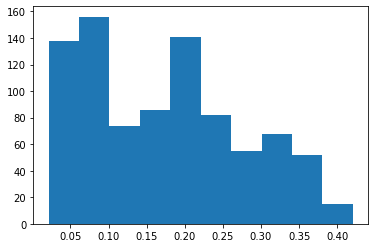

In [46]:
ay = plt.hist(hm_95)

In [48]:
with open('data/Y/HM_95.npy','wb') as f:
    np.save(f, hm_95)

In [ ]:
X = np.load('data/X/HM_X_ang_vel.npy')
X.shape

### New New Data bring about problem

how to handle large data: as large as $10^{28}$ ... 
wait no, larger than $10^{308}$ ...

In [ ]:
import os
os.listdir('data/X')

In [21]:
import numpy as np
X = np.load('data/X/HM_X_ang_vel.npy')

In [23]:
newX = np.delete(X, [46,48,50], 1)

In [8]:
import sys
sys.float_info


sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [9]:
X.dtype

dtype('float64')

In [10]:
float('inf')

inf

In [14]:
X[0,48]

inf

In [17]:
X[0,48] = 1e29

In [18]:
X[0,48]

1e+29

In [19]:
np.finfo('float64').max

1.7976931348623157e+308

In [45]:
# decide to drop several columns
import numpy as np
X = np.load('data/X/HM_X_ang_vel.npy')

In [42]:
newX = np.delete(X, [46,48,50], 1)
newX.shape

(184, 48)

In [43]:
with open('data\\X\\AF_X_ang_vel.npy','wb') as f:
    np.save(f, newX)

In [44]:
X = np.load('data/X/AF_X_ang_vel.npy')
X.shape

(184, 48)

In [1]:
!pip install statsmodels

You are using pip version 19.0.3, however version 20.2b1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## VIF

In [3]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [17]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = list(range(X.shape[1]))
    vif["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

    return(vif)

In [6]:
import numpy as np
X = np.load('data/X/HM_X_ang_vel.npy')

In [18]:
variance_inflation_factor(X, 2)

0.663719707050424

In [20]:
vif_df = calc_vif(X)


In [30]:
vif_df

,variables,VIF
0,0,0.758610
1,1,0.733677
2,2,0.663720
3,3,1.327153
4,4,0.811514
5,5,0.783419
6,6,0.344440
7,7,0.944525
8,8,0.807175
9,9,0.687489


1.选模型
    -VIF: feature selection
    -RAW
    -huber, least square

2.GOAL: feature importance
    -first, last, standard coefficients
    -一致性?
        -跨数据
        -方法

task1: least square + 方法一致性:standard coefficients, first, last
task2: 数据一致性(NFL, AF, PAC重复task1)

#### Aug 6

In [11]:
from util_relaimpo import _aps, ca
from util import loadNpy, loadCsv
import pandas as pd
# test CA
from sklearn import datasets

In [13]:
iris = datasets.load_iris()
X = pd.DataFrame(iris.data[:,1:4])
Y = iris.data[:,0]
a = _aps(X, Y)
b = ca(X, Y)

In [14]:
b


,feature names,coefficients,percent
0,[0],0.0924,0.1076
1,[1],0.1514,0.1763
2,[2],0.1896,0.2208
3,"[0, 1]",-0.2253,-0.2624
4,"[0, 2]",-0.1833,-0.2135
5,"[1, 2]",0.5038,0.5868
6,"[0, 1, 2]",0.3300,0.3844


In [15]:
a


(   index feature names        r2
 0      0             0  0.013823
 1      1             1  0.759955
 2      2             2  0.669028
 3      3           0,1  0.840178
 4      4           0,2  0.707237
 5      5           1,2  0.766261
 6      6         0,1,2  0.858612,
        0      1      2    0,1    0,2    1,2  0,1,2
 0   True  False  False   True   True  False   True
 1  False   True  False   True  False   True   True
 2  False  False   True  False   True   True   True,
 [[0], [1], [2], [0, 1], [0, 2], [1, 2], [0, 1, 2]])